In [4]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from numpy.linalg import eigh
import sys
import itertools
import time
from matplotlib import pyplot as plt

In [5]:
os.chdir(r'C:\Users\WANGLIN CAI\fintech545\Week03')

In [6]:
DR = pd.read_csv('DailyReturn.csv')

In [7]:
DR.head(5)

,Unnamed: 0,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,2021/10/21,0.002608,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
1,2021/10/22,-0.001036,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
2,2021/10/25,0.005363,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145
3,2021/10/26,0.000900,0.004575,0.006426,0.016775,-0.006274,0.013543,0.006478,-0.039186,0.066952,...,-0.002263,0.008121,0.003337,-0.003545,0.000887,-0.118035,0.000476,-0.006752,-0.002013,0.001073
4,2021/10/27,-0.004430,-0.003148,0.042114,0.004864,0.019078,0.049595,0.048367,-0.011368,-0.010762,...,-0.014625,-0.007233,-0.012679,-0.052368,-0.014174,-0.002922,-0.017132,-0.054210,-0.022191,-0.011786


In [8]:
DR.iloc[:,1:102].cov()

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
SPY,0.000078,0.000092,1.010179e-04,0.000086,0.000192,0.000093,0.000094,0.000115,0.000221,3.138730e-05,...,0.000070,0.000029,-0.000012,0.000098,0.000010,2.342080e-05,0.000087,0.000120,0.000086,0.000085
AAPL,0.000092,0.000257,1.557756e-04,0.000164,0.000321,0.000122,0.000123,0.000122,0.000319,4.840384e-07,...,0.000040,-0.000009,-0.000062,0.000143,0.000006,-1.772938e-06,0.000077,0.000093,0.000044,0.000078
MSFT,0.000101,0.000156,2.547999e-04,0.000130,0.000302,0.000201,0.000199,0.000148,0.000349,-6.264725e-06,...,0.000009,0.000002,-0.000045,0.000114,-0.000026,4.834127e-07,0.000082,0.000071,0.000025,0.000066
AMZN,0.000086,0.000164,1.297129e-04,0.000261,0.000166,0.000155,0.000154,0.000152,0.000401,-6.332347e-06,...,0.000018,0.000010,-0.000044,0.000132,0.000003,-2.135792e-05,0.000069,0.000025,0.000037,0.000109
TSLA,0.000192,0.000321,3.018838e-04,0.000166,0.002052,0.000169,0.000178,0.000275,0.000732,-2.088436e-05,...,0.000129,-0.000085,-0.000136,0.000274,0.000041,5.138087e-05,0.000135,0.000316,0.000177,0.000154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LMT,0.000023,-0.000002,4.834127e-07,-0.000021,0.000051,-0.000008,0.000005,0.000146,-0.000129,3.723024e-05,...,0.000045,0.000014,0.000032,0.000019,0.000006,3.132292e-04,0.000046,0.000096,0.000059,0.000045
SYK,0.000087,0.000077,8.152754e-05,0.000069,0.000135,0.000091,0.000091,0.000120,0.000125,5.124850e-05,...,0.000104,0.000031,0.000022,0.000118,0.000015,4.600008e-05,0.000260,0.000181,0.000123,0.000129
GM,0.000120,0.000093,7.144827e-05,0.000025,0.000316,0.000079,0.000083,0.000119,0.000285,1.153542e-04,...,0.000234,0.000051,0.000057,0.000164,0.000019,9.552426e-05,0.000181,0.000730,0.000236,0.000194
TFC,0.000086,0.000044,2.494068e-05,0.000037,0.000177,0.000041,0.000041,0.000099,0.000126,1.226939e-04,...,0.000257,0.000067,0.000043,0.000084,0.000030,5.885253e-05,0.000123,0.000236,0.000301,0.000094


In [9]:
def getweight(DF, L):
    
    nrows = DF.shape[0]
    weights = np.zeros(nrows)
    
    for i in range(nrows,0,-1):
        weights[i-1] = (1 - L) * (L**(i-1))
    weights = weights[::-1]
    return weights/weights.sum()

#weights = getweight(0.97,DR.shape[0])

def weightedcov(DF, L):
    
    matrix = np.matrix(DF.values)
    weights = getweight(DF, L)
    weightedcov = np.zeros([matrix.shape[1], matrix.shape[1]])
    
    for i in range(0,matrix.shape[1]):
        
        x = np.array(matrix[:,i]-matrix[:,i].mean())
        w_x = [weights[j]*x[j] for j in range(len(weights))]
        w_x = np.asmatrix(w_x)

        for k in range(0,matrix.shape[1]):
            
            y = np.asmatrix(matrix[:,k]-matrix[:,k].mean())
            weightedcov[i,k] += np.dot(w_x.T,y)
 
    return weightedcov

# ignore the date column
wcov = weightedcov(DR.iloc[:,1:102], L = 0.97)
wcov



array([[8.41106909e-05, 1.06945662e-04, 1.21760871e-04, ...,
        1.25484463e-04, 8.11331555e-05, 8.61130395e-05],
       [1.06945662e-04, 2.68752303e-04, 1.97531665e-04, ...,
        1.15658764e-04, 3.74977522e-05, 8.22220854e-05],
       [1.21760871e-04, 1.97531665e-04, 2.91157502e-04, ...,
        8.30278956e-05, 3.31844912e-05, 7.34713753e-05],
       ...,
       [1.25484463e-04, 1.15658764e-04, 8.30278956e-05, ...,
        7.47889224e-04, 2.68371109e-04, 2.00639601e-04],
       [8.11331555e-05, 3.74977522e-05, 3.31844912e-05, ...,
        2.68371109e-04, 3.08241679e-04, 8.21009546e-05],
       [8.61130395e-05, 8.22220854e-05, 7.34713753e-05, ...,
        2.00639601e-04, 8.21009546e-05, 2.62692778e-04]])

In [10]:
wcov = weightedcov(DR.iloc[:,1:102], L = 0.97)
pd.DataFrame(wcov).iloc[:5,:5]

,0,1,2,3,4
0,0.000084,0.000107,0.000122,0.000093,0.000231
1,0.000107,0.000269,0.000198,0.000171,0.000433
2,0.000122,0.000198,0.000291,0.000149,0.000409
3,0.000093,0.000171,0.000149,0.000233,0.000303
4,0.000231,0.000433,0.000409,0.000303,0.002002


In [12]:
def simulate_pca(matrix):
    col = []
    for i in range(1, matrix.shape[0]+1):
            
        # Eigenvalue decomposition
        vals, vecs = linalg.eig(matrix)
        vals = vals.real
        vecs = vecs.real
        
        rank = vals.argsort()
        vals = vals[rank]
        vecs = vecs[:, rank]
        
        # sort from big to small
        flip = [i for i in range(len(vals)-1, -1, -1)]
        vals = vals[flip]
        vecs = vecs[:, flip]

        tv = sum(vals)

        posv = np.where(vals >= 1e-8)[0]
        if i < len(posv):
            posv = posv[:i]

        vals = vals[posv]
        vecs = vecs[:, posv]

        col.append(sum(vals)/tv*100)
    return col
    '''
    print(f"Simulating with {len(posv)} PC Factors: {sum(vals)/tv*100:.2f}% total variance explained")
    B = np.dot(vecs, np.diag(np.sqrt(vals)))
    
    matrix = len(vals)
    r = np.random.randn(matrix, nsim)

    return np.dot(B, r).T
    '''
data_1 = pd.DataFrame()
data_1['0.1'] = simulate_pca(weightedcov(DR.iloc[:,1:102], L = 0.1))
data_1['0.3'] = simulate_pca(weightedcov(DR.iloc[:,1:102], L = 0.3))
data_1['0.5'] = simulate_pca(weightedcov(DR.iloc[:,1:102], L = 0.5))
data_1['0.7'] = simulate_pca(weightedcov(DR.iloc[:,1:102], L = 0.7))
data_1['0.9'] = simulate_pca(weightedcov(DR.iloc[:,1:102], L = 0.9))
data_1['0.97'] = simulate_pca(weightedcov(DR.iloc[:,1:102], L = 0.97))


In [13]:
data_1

,0.1,0.3,0.5,0.7,0.9,0.97
0,87.307864,68.111334,52.616934,40.964919,33.158294,31.457288
1,99.714732,96.891731,88.747238,70.890844,51.257800,47.043096
2,99.948649,98.576954,92.864982,79.984566,63.090816,54.040358
3,99.994546,99.549956,96.224052,85.772173,68.929479,58.898957
4,99.999374,99.841364,97.764412,89.465602,73.419400,63.068385
...,...,...,...,...,...,...
96,99.999991,99.999977,99.999979,99.999895,100.000000,100.000000
97,99.999991,99.999977,99.999979,99.999895,100.000000,100.000000
98,99.999991,99.999977,99.999979,99.999895,100.000000,100.000000
99,99.999991,99.999977,99.999979,99.999895,100.000000,100.000000


Text(0, 0.5, 'cumulative variance explained')

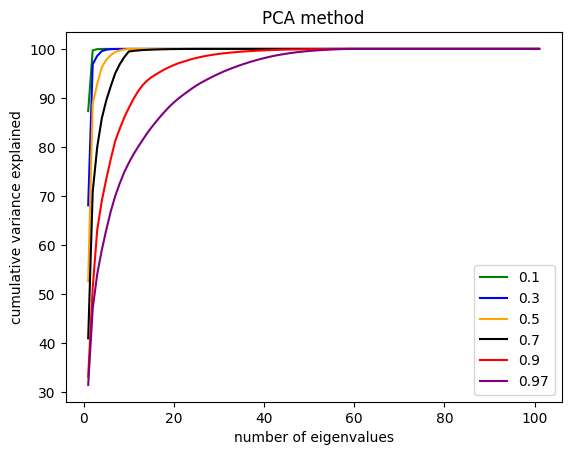

In [14]:
plt.title('PCA method')
x = np.arange(1,102)
plt.plot(x, data_1['0.1'], color = 'green', label='0.1')
plt.plot(x, data_1['0.3'], color = 'blue', label='0.3')
plt.plot(x, data_1['0.5'], color = 'orange', label='0.5')
plt.plot(x, data_1['0.7'], color = 'black', label='0.7')
plt.plot(x, data_1['0.9'], color = 'red', label='0.9')
plt.plot(x, data_1['0.97'], color = 'purple', label='0.97')
plt.legend()
plt.xlabel('number of eigenvalues')
plt.ylabel('cumulative variance explained')
